In [1]:
from func import *
import pandas as pd
import numpy as np

import spacy
from nltk.corpus import stopwords
import string
import re

### Load the data

In [2]:
df = load_data(data = 'musical')

In [3]:
df.shape

(10261, 9)

### Data Cleaning

In [10]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [12]:
## Remove the 
def text_normalization(doc):
    '''
    lemmentize the words and also remove the stopwords and punctuation
    '''
    nlp = spacy.load('en_core_web_sm')
    punctuations = string.punctuation
    doc = nlp(doc, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in spacy_stopwords and tok not in punctuations]
    tokens = ' '.join(tokens)
    return tokens
normalize_corpus = np.vectorize(text_normalization)
df['reviewText_norm'] = normalize_corpus(df['reviewText'])

In [229]:

def doc_normalization(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    return doc
normalize_corpus2 = np.vectorize(doc_normalization)

In [230]:
df['reviewText_norm1'] = normalize_corpus2(df['reviewText_norm'])

In [377]:
df.shape

(10261, 11)

In [253]:
X = df['reviewText_norm1']
y = df['overall']

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the Ratings

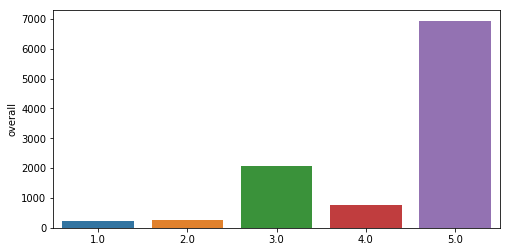

In [339]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x = y.unique(), y=y.value_counts())
plt.show()

### Print the Most Frequent words for each class

In [ ]:
INFO_text = [text for text in X_train[X_train['Conference'] == 'INFOCOM']['Title']]
IS_text = [text for text in train[train['Conference'] == 'ISCAS']['Title']]
INFO_clean = cleanup_text(INFO_text)
INFO_clean = ' '.join(INFO_clean).split()
IS_clean = cleanup_text(IS_text)
IS_clean = ' '.join(IS_clean).split()
INFO_counts = Counter(INFO_clean)
IS_counts = Counter(IS_clean)
INFO_common_words = [word[0] for word in INFO_counts.most_common(20)]
INFO_common_counts = [word[1] for word in INFO_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=INFO_common_words, y=INFO_common_counts)
plt.title('Most Common Words used in the research papers for conference INFOCOM')
plt.show()

# Import the necessary modules


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 53)

# Bag of Words

In [374]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words = "english", ngram_range=(1, 2), min_df=.01, max_df=.99)

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'tex t' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:700])

['able', 'absolutely', 'ac', 'accurate', 'acoustic', 'acoustic electric', 'acoustic guitar', 'action', 'actually', 'adapter', 'add', 'adjust', 'adjustable', 'adjustment', 'advertise', 'ago', 'allow', 'amazing', 'amazon', 'amp', 'angle', 'apart', 'appear', 'arm', 'arrive', 'ask', 'attach', 'audio', 'available', 'away', 'awesome', 'bad', 'bag', 'ball', 'band', 'bar', 'base', 'basic', 'basically', 'bass', 'battery', 'beat', 'beginner', 'behringer', 'believe', 'bend', 'best', 'better', 'big', 'bit', 'black', 'blue', 'board', 'body', 'boost', 'boss', 'box', 'brand', 'break', 'bridge', 'bright', 'bring', 'buck', 'budget', 'build', 'build quality', 'button', 'buy', 'buzz', 'cable', 'capo', 'care', 'carry', 'case', 'cause', 'center', 'certainly', 'chain', 'change', 'change string', 'channel', 'cheap', 'check', 'choice', 'choose', 'chord', 'clamp', 'classic', 'clean', 'clear', 'clip', 'close', 'cloth', 'color', 'come', 'comfortable', 'compact', 'company', 'compare', 'complain', 'complaint', 'co

In [375]:
len(count_vectorizer.get_feature_names())

633

In [392]:
count_train.toarray().shape

(6874, 633)

In [341]:
# stop_words = set(count_vectorizer.get_feature_names()[:700])

# X_train1 = X_train.apply(lambda sentence: 
#                          ' '.join([word for word in sentence.split() if word.lower() not in stop_words])) #

# X_train

# X_train1

# X_test1 = X_test.apply(lambda sentence: 
#                        ' '.join([word for word in sentence.split() if word.lower() not in stop_words])) #

In [342]:
# # Initialize a CountVectorizer object: count_vectorizer
# count_vectorizer1 = CountVectorizer(stop_words = "english")

# # Transform the training data using only the 'text' column values: count_train 
# count_train = count_vectorizer1.fit_transform(X_train1)

# # Transform the test data using only the 'tex t' column values: count_test 
# count_test = count_vectorizer1.transform(X_test1)

# # Print the first 10 features of the count_vectorizer
# print(count_vectorizer1.get_feature_names()[:300])

### Cross Validation

In [367]:
# Import the necessary modules
from sklearn import metrics
# from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),
            'prec': 'precision'}

# Instantiate a Multinomial Naive Bayes classifier: lr_classifier
lr_classifier = LogisticRegression(C=1e5, solver='newton-cg', multi_class='multinomial') 
                    #, class_weight = weights)

scores = cross_validate(lr_classifier, count_train, y_train, cv=3,
                         scoring=['accuracy', 'f1_weighted'],
                         return_train_score=True)



/Users/ZYe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ZYe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [368]:
scores

{'fit_time': array([0.33208585, 0.32400393, 0.24904299]),
 'score_time': array([0.00259519, 0.00169301, 0.002002  ]),
 'test_accuracy': array([0.66768426, 0.67568747, 0.67641921]),
 'train_accuracy': array([0.6780179 , 0.67706742, 0.67822862]),
 'test_f1_weighted': array([0.54921086, 0.55338102, 0.55846713]),
 'train_f1_weighted': array([0.55869991, 0.55555631, 0.56038014])}

In [ ]:
lr_classifier.coef_

feature_names = count_vectorizer.get_feature_names()
coefs_with_fns = sorted(zip(lr_classifier.coef_[1], feature_names))

def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns_1 = sorted(zip(clf.coef_[0], feature_names))
    coefs_with_fns_2 = sorted(zip(clf.coef_[1], feature_names))
    coefs_with_fns_3 = sorted(zip(clf.coef_[2], feature_names))
    coefs_with_fns_4 = sorted(zip(clf.coef_[3], feature_names))
    coefs_with_fns_5 = sorted(zip(clf.coef_[4], feature_names))
    topClass1 = coefs_with_fns_1[:N]
    topClass2 = coefs_with_fns_2[:N]
    topClass3 = coefs_with_fns_3[:N]
    topClass4 = coefs_with_fns_4[:N]
    topClass5 = coefs_with_fns_5[:N]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)
    print("Class 3 best: ")
    for feat in topClass3:
        print(feat)
    print("Class 4 best: ")
    for feat in topClass4:
        print(feat)
    print("Class 5 best: ")
    for feat in topClass5:
        print(feat)

printNMostInformative(count_vectorizer, lr_classifier, 15)

### tfidf

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 2), max_df=0.99, min_df=0.01)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

In [ ]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

### Cross Validation

In [385]:
# Instantiate a Multinomial Naive Bayes classifier: lr_classifier
lr_classifier = LogisticRegression(C=1e5, solver='newton-cg', multi_class='multinomial') 
                    #, class_weight = weights)

scores = cross_validate(lr_classifier, tfidf_train, y_train, cv=3,
                         scoring=['accuracy', 'f1_weighted'],
                         return_train_score=True)

In [386]:
scores

{'fit_time': array([8.70167112, 9.3029089 , 7.52045417]),
 'score_time': array([0.00242686, 0.00211096, 0.00213671]),
 'test_accuracy': array([0.60052333, 0.6001746 , 0.60305677]),
 'train_accuracy': array([0.7987339 , 0.8020947 , 0.79057592]),
 'test_f1_weighted': array([0.59032733, 0.58622763, 0.59111767]),
 'train_f1_weighted': array([0.7828489 , 0.7856703 , 0.77327812])}

### Train

In [400]:
# Instantiate a Multinomial Naive Bayes classifier: lr_classifier
lr_classifier = LogisticRegression(C=1e5, solver='newton-cg', multi_class='multinomial')

# Fit the classifier to the training data
lr_classifier.fit(count_train,y_train)

# Create the predicted tags: pred
pred = lr_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
# from sklearn.metrics import multilabel_confusion_matrix
# cm = multilabel_confusion_matrix(y_test, pred, labels=['1Star',"2Star", '3Star', '4Star', '5Star'])
# print(cm)

0.6194272217301446


/Users/ZYe/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
